<a href="https://colab.research.google.com/github/raishagun/Election-Prediction/blob/master/StatewisePolitics/Madhya%20Pradesh/congressMP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [94]:
!git clone https://github.com/raishagun/Election-Prediction.git

fatal: destination path 'Election-Prediction' already exists and is not an empty directory.


In [95]:
import tweepy 
import pandas as pd
from tweepy import OAuthHandler


access_token="1289037463684489217-5PddOsmU9h5deRwOhdigvhg32FEgID"
access_token_secret="cAPevFduWkiNP3juu8WGAwZm69vgv8C4s8RPz0WE8MJFK"

consumer_key="DLhoHkK6uOGz3Ni9ybuoruiLm"
consumer_secret="jKyrDR68msnbmgZMNNJdSJwadGoed11imKV1jdlNYNczL9HvEk"

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)  # authentication of access token and secret 
auth.set_access_token(access_token, access_token_secret) 
api = tweepy.API(auth,wait_on_rate_limit = True)


date1 = "2020-11-01"  #Date from which you need to extract tweets
date2 = "2020-11-22"  #Date till when you need to extract tweets

date =[]
user_id = []
verified = []
text = []
user = []
location = []
source = []
likes = []
followers = []
following = []
retweets = []

def get_tweets(date1,date2,word):
    count = 0
    for tweet in tweepy.Cursor(api.search , q=word,count =1000,lang="en",since_id = date1,until = date2,tweet_mode = 'extended').items():
        print(tweet.created_at)  #Date at which it was tweet
        date.append(tweet.created_at)
        print(tweet.id)          #Unique ID of tweet
        user_id.append(tweet.id)
        print(tweet.user.verified)   #If user who tweet is verified or not
        verified.append(tweet.user.verified)
        print(tweet.full_text)   #To get full text of the tweet
        text.append(tweet.full_text)
        print(tweet.user.screen_name)  #User screen name
        user.append(tweet.user.screen_name)
        print(tweet.user.location)     #Location from where the tweet came
        location.append(tweet.user.location)
        print(tweet.source)            #Which twitter application was used to tweet
        source.append(tweet.source)
        print(tweet.favorite_count)     #Number of likes on the tweet
        likes.append(tweet.favorite_count)
        print(tweet.user.followers_count)    #Number of followers of the user
        followers.append(tweet.user.followers_count)
        print(tweet.user.friends_count)      #Number of following by the user
        following.append(tweet.user.friends_count)
        print(tweet.retweet_count)               #Number of the retweets of the original tweet
        retweets.append(tweet.retweet_count)
    
        print('<--------------------------------------------------->')
        count+=1
        print(count)
    
get_tweets(date1,date2,"congress MP"+" -filter:retweets") #Filtering out retweets to avoid duplication

data = list(zip(date,user_id,verified,text,user,location,source,likes,followers,following,retweets))
df = pd.DataFrame(data =data, columns =["Date","Tweet_id","Verified","Tweet",
                                   "User","Location","Source","Likes","Followers","Following","Retweets"])

           
df.to_csv('congress_mp.csv',index = False)

Streaming output truncated to the last 5000 lines.
Ghana
NetworkofNews_Ghana
0
1617
13
0
<--------------------------------------------------->
515
2020-11-17 16:44:41
1328740857080528896
False
@Savitritvs @OberoiZorawar @Visalmama @sureshseshadri1 @IndianRajeshNCo @ArunDeshpande20 @desai_ujjwala @Satishrathod100 @prasad_perla @nair_hena @neerangautam @deepaknkhanna @NetaNiyanta @ChowkidarChokra @Murali76133156 @GenPanwar @chowkidar_first @tmmenon @Am_dilip1 @DrBosch3 @Diptang01274703 @_ankahi @Priyakhi2 @Raviblr15 @PresiIndia1 @nilesh_pat @KSMANN @RASHMI32796008 @mayankpant22 @sbk1963 @RakeshA12572734 @shekhar261976 @Balbhad57312750 @bshariharan @bala2705 @Krishna15465023 @Rajendrap1078 @vka_raj @SuraiyaHasan8 @Bharatwashi1 @matreebhoomi @jaydewana21 @namonamo2050 @mkm4118 @romy1965 @nrajabpcl @keeranl Atleast read the news before you try to talk 
Swamy finally gets what he wanted 
https://t.co/RZ1cgYjYZu
Maha_periyava_
SHALMALI DWEEPA


Twitter for Android
6
1434
1008
1
<-------------

In [96]:
import re
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

import datetime as dt
from collections import Counter

import nltk
from nltk.tokenize import sent_tokenize
from nltk.tokenize import TweetTokenizer
from nltk.tokenize import word_tokenize
from nltk.corpus import words
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 867 entries, 0 to 866
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       867 non-null    datetime64[ns]
 1   Tweet_id   867 non-null    int64         
 2   Verified   867 non-null    bool          
 3   Tweet      867 non-null    object        
 4   User       867 non-null    object        
 5   Location   867 non-null    object        
 6   Source     867 non-null    object        
 7   Likes      867 non-null    int64         
 8   Followers  867 non-null    int64         
 9   Following  867 non-null    int64         
 10  Retweets   867 non-null    int64         
dtypes: bool(1), datetime64[ns](1), int64(5), object(4)
memory usage: 68.7+ KB


In [98]:
df.shape

(867, 11)

In [99]:
df['Date'] = df['Date'].apply(lambda x: dt.datetime.strptime(str(x),'%Y-%m-%d %H:%M:%S')) #Convert to date time format

In [100]:
df.dtypes

Date         datetime64[ns]
Tweet_id              int64
Verified               bool
Tweet                object
User                 object
Location             object
Source               object
Likes                 int64
Followers             int64
Following             int64
Retweets              int64
dtype: object

In [101]:
df.isnull().sum()

Date         0
Tweet_id     0
Verified     0
Tweet        0
User         0
Location     0
Source       0
Likes        0
Followers    0
Following    0
Retweets     0
dtype: int64

In [102]:
df['Source'].value_counts()

Twitter for Android                 392
Twitter Web App                     238
Twitter for iPhone                  122
TweetDeck                            28
Hootsuite Inc.                       14
Buffer                               10
Mailchimp                            10
Twitter for iPad                      8
Twitter Media Studio - LiveCut        6
IFTTT                                 5
Twitter Media Studio                  4
dlvr.it                               4
cmssocialservice                      3
Rajneeti News                         2
WordPress.com                         2
NetworkofNews_Ghana                   2
Republicworld                         2
SocialPilot.co                        1
Sputnik v2.0                          1
ClarionIndia                          1
                                      1
ht-twitter-handler                    1
Coosto                                1
PTI_Tweets                            1
Blog2Social APP                       1


In [103]:
df['Location'].nunique()

341

In [104]:
tweets_list = df['Tweet'].tolist()
len(tweets_list)

867

In [105]:
tweets_list_updated = set(tweets_list)
len(tweets_list_updated)


864

In [106]:
tweets_list_updated  = list(tweets_list_updated)
type(tweets_list_updated)

list

In [107]:
df['Tweet'].duplicated().sum()

3

In [108]:
df = df.drop_duplicates(subset = 'Tweet', keep = 'first',ignore_index = True)
df.shape

(864, 11)

In [109]:
df['Tweet'].duplicated().sum()

0

In [110]:
def remove_emoji(tweet):
    emoji_pattern = re.compile("["
            u"\U0001F600-\U0001F64F"  # emoticons
            u"\U0001F300-\U0001F5FF"  # symbols & pictographs
            u"\U0001F680-\U0001F6FF"  # transport & map symbols
            u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', tweet)

df['Processed_Tweet']=df.Tweet.apply(remove_emoji)

In [111]:
count=0
for i in df['Processed_Tweet']:
    if re.match(r'^RT', i):  #remove any rows that contain RT
        df.drop(df.loc[df['Processed_Tweet']==i].index,inplace = True)
        count+=1
    
count

0

In [112]:
df.shape

(864, 12)

In [113]:
df['Processed_Tweet']

0      #BREAKING \n\nProtesters burn part of #Guatema...
1      @KumarK31857624 Commonwealth Games scam was ex...
2      Who is the Leader of Congress?\nIs it a cow sh...
3      @GurrehmatO @KaushikAnubhav2 @kannadaveera @Th...
4      @sardesairajdeep @KapilSibal @IndiaToday I agr...
                             ...                        
859    BJP ne MP banaya lekin Dr. ambedkar ke Constit...
860    Senior member of the Congress family and Rajya...
861    @RNagothu Is it true that 'Savarkar &amp; Nath...
862    #Congress MP Ahmed Patel admitted to the Inten...
863    Congress MP Ahmed Patel admitted to the Intens...
Name: Processed_Tweet, Length: 864, dtype: object

In [114]:
df['Processed_Tweet'] = [re.sub('^RT[\s]','',i) for i in df['Processed_Tweet']]  #Remove RT substring
df['Processed_Tweet']

0      #BREAKING \n\nProtesters burn part of #Guatema...
1      @KumarK31857624 Commonwealth Games scam was ex...
2      Who is the Leader of Congress?\nIs it a cow sh...
3      @GurrehmatO @KaushikAnubhav2 @kannadaveera @Th...
4      @sardesairajdeep @KapilSibal @IndiaToday I agr...
                             ...                        
859    BJP ne MP banaya lekin Dr. ambedkar ke Constit...
860    Senior member of the Congress family and Rajya...
861    @RNagothu Is it true that 'Savarkar &amp; Nath...
862    #Congress MP Ahmed Patel admitted to the Inten...
863    Congress MP Ahmed Patel admitted to the Intens...
Name: Processed_Tweet, Length: 864, dtype: object

In [115]:
df['Processed_Tweet'] = [re.sub('@[^\s]+', ' ', i) for i in df['Processed_Tweet']] #remove usernames
df['Processed_Tweet']

0      #BREAKING \n\nProtesters burn part of #Guatema...
1        Commonwealth Games scam was exposed in 2010 ...
2      Who is the Leader of Congress?\nIs it a cow sh...
3              1984 riots m 'sajjan kumar' culprit th...
4            I agree with you. Congress is a very tin...
                             ...                        
859    BJP ne MP banaya lekin Dr. ambedkar ke Constit...
860    Senior member of the Congress family and Rajya...
861      Is it true that 'Savarkar &amp; Nathuram God...
862    #Congress MP Ahmed Patel admitted to the Inten...
863    Congress MP Ahmed Patel admitted to the Intens...
Name: Processed_Tweet, Length: 864, dtype: object

In [116]:
df['Processed_Tweet'] = [re.sub('((www\.[^\s]+)|(https?://[^\s]+))', '', i) for i in df['Processed_Tweet']] #Remove urls
df['Processed_Tweet']

0      #BREAKING \n\nProtesters burn part of #Guatema...
1        Commonwealth Games scam was exposed in 2010 ...
2      Who is the Leader of Congress?\nIs it a cow sh...
3              1984 riots m 'sajjan kumar' culprit th...
4            I agree with you. Congress is a very tin...
                             ...                        
859    BJP ne MP banaya lekin Dr. ambedkar ke Constit...
860    Senior member of the Congress family and Rajya...
861      Is it true that 'Savarkar &amp; Nathuram God...
862    #Congress MP Ahmed Patel admitted to the Inten...
863    Congress MP Ahmed Patel admitted to the Intens...
Name: Processed_Tweet, Length: 864, dtype: object

In [117]:
df['Processed_Tweet'] = [re.sub(r'#([^\s]+)', r'\1', i) for i in df['Processed_Tweet']] # remove the # in #hashtag
df['Processed_Tweet']

0      BREAKING \n\nProtesters burn part of Guatemala...
1        Commonwealth Games scam was exposed in 2010 ...
2      Who is the Leader of Congress?\nIs it a cow sh...
3              1984 riots m 'sajjan kumar' culprit th...
4            I agree with you. Congress is a very tin...
                             ...                        
859    BJP ne MP banaya lekin Dr. ambedkar ke Constit...
860    Senior member of the Congress family and Rajya...
861      Is it true that 'Savarkar &amp; Nathuram God...
862    Congress MP Ahmed Patel admitted to the Intens...
863    Congress MP Ahmed Patel admitted to the Intens...
Name: Processed_Tweet, Length: 864, dtype: object

In [118]:
!pip install tweet-preprocessor

In [119]:
import preprocessor as p #Module for faster preprocessing specifically for tweets
df['Processed_Tweet'] = [p.clean(i) for i in df['Processed_Tweet']]
df['Processed_Tweet']

0      BREAKING Protesters burn part of Guatemala's C...
1      Commonwealth Games scam was exposed in and in ...
2      Who is the Leader of Congress?Is it a cow shed...
3      riots m 'sajjan kumar' culprit tha.. Phir bhi ...
4      I agree with you. Congress is a very tiny part...
                             ...                        
859    BJP ne MP banaya lekin Dr. ambedkar ke Constit...
860    Senior member of the Congress family and Rajya...
861    Is it true that 'Savarkar &amp; Nathuram Godse...
862    Congress MP Ahmed Patel admitted to the Intens...
863    Congress MP Ahmed Patel admitted to the Intens...
Name: Processed_Tweet, Length: 864, dtype: object

In [120]:
#removing unnecessary special characters, numbers, punctuations in tweets
df.Processed_Tweet = df.Processed_Tweet.str.replace("[^a-zA-Z]", " ")
df["Processed_Tweet"]

0      BREAKING Protesters burn part of Guatemala s C...
1      Commonwealth Games scam was exposed in and in ...
2      Who is the Leader of Congress Is it a cow shed...
3      riots m  sajjan kumar  culprit tha   Phir bhi ...
4      I agree with you  Congress is a very tiny part...
                             ...                        
859    BJP ne MP banaya lekin Dr  ambedkar ke Constit...
860    Senior member of the Congress family and Rajya...
861    Is it true that  Savarkar  amp  Nathuram Godse...
862    Congress MP Ahmed Patel admitted to the Intens...
863    Congress MP Ahmed Patel admitted to the Intens...
Name: Processed_Tweet, Length: 864, dtype: object

In [121]:
df.Processed_Tweet = [low.lower() for low in df.Processed_Tweet] #Converting into lower case
df["Processed_Tweet"]

0      breaking protesters burn part of guatemala s c...
1      commonwealth games scam was exposed in and in ...
2      who is the leader of congress is it a cow shed...
3      riots m  sajjan kumar  culprit tha   phir bhi ...
4      i agree with you  congress is a very tiny part...
                             ...                        
859    bjp ne mp banaya lekin dr  ambedkar ke constit...
860    senior member of the congress family and rajya...
861    is it true that  savarkar  amp  nathuram godse...
862    congress mp ahmed patel admitted to the intens...
863    congress mp ahmed patel admitted to the intens...
Name: Processed_Tweet, Length: 864, dtype: object

In [122]:
df.Processed_Tweet =  df.Processed_Tweet.str.replace("amp", "")
df['Processed_Tweet'][12] #Sample tweet

'beloved leader of the congress  especially wayanad  former mp shri  prostration in memory of mi shanavas on his second death anniversary shri rahul gandhi ji'

In [123]:
df['User'].value_counts()

TimesNow           10
Sanjeev26109683     6
APRAHULSENAGRO      5
Karma202013         5
ANI                 5
                   ..
isvelan             1
Ramagirinanthan     1
byraghavk           1
pallavijha          1
Krishu15296182      1
Name: User, Length: 720, dtype: int64

In [124]:
df.query('User == "jacketrose86"').Processed_Tweet.tolist()

[]

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


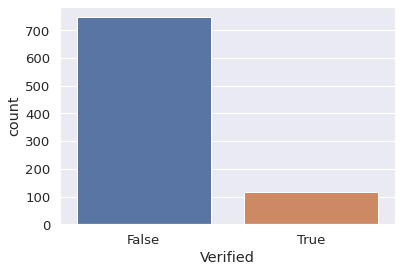

In [125]:
bar = sns.countplot(df['Verified'])

In [126]:
df['Verified'].value_counts()

False    747
True     117
Name: Verified, dtype: int64

In [127]:
df_verified = df.query('Verified == True')
df_verified['User'].value_counts()

TimesNow           10
VNarayanasami       5
ANI                 5
republic            4
IndiaToday          4
                   ..
CSPANClassroom      1
AmanKayamHai_ET     1
otvnews             1
zilevandamme        1
TOICitiesNews       1
Name: User, Length: 70, dtype: int64

In [128]:
days = df['Date'].dt.day.tolist()
no_of_days = Counter(days)
no_of_days

Counter({15: 59, 16: 185, 17: 138, 18: 109, 19: 127, 20: 136, 21: 110})

Text(0.5, 1.0, 'Count Of Extracted Tweets On Each Day')

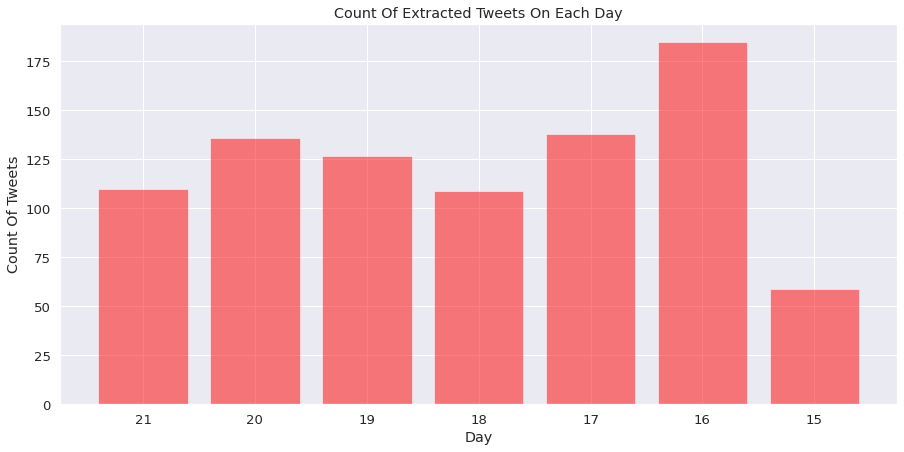

In [129]:
fig = plt.figure(figsize = (15,7))
plt.bar(range(len(no_of_days)), list(no_of_days.values()), align='center', alpha = 0.5,color = 'red')
plt.xticks(range(len(no_of_days)), list(no_of_days.keys()))
plt.xlabel("Day")
plt.ylabel("Count Of Tweets")
plt.title("Count Of Extracted Tweets On Each Day")

In [130]:
hours = df['Date'].dt.hour.tolist()
no_of_hours = Counter(hours)
no_of_hours

Counter({0: 7,
         1: 9,
         2: 27,
         3: 27,
         4: 34,
         5: 36,
         6: 37,
         7: 50,
         8: 43,
         9: 36,
         10: 39,
         11: 50,
         12: 33,
         13: 74,
         14: 62,
         15: 75,
         16: 66,
         17: 48,
         18: 34,
         19: 20,
         20: 19,
         21: 13,
         22: 11,
         23: 14})

Text(0.5, 1.0, 'Count Of Extracted Tweets On Each Hour')

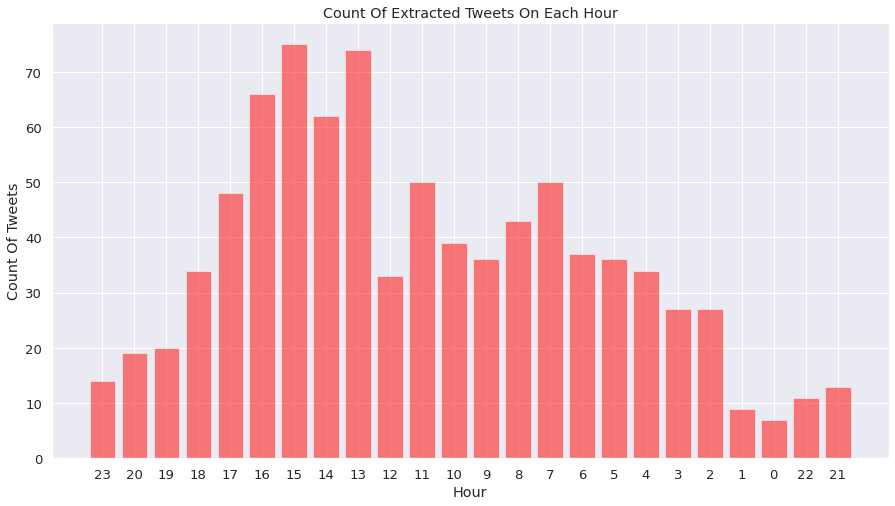

In [131]:
fig = plt.figure(figsize = (15,8))
plt.bar(range(len(no_of_hours)), list(no_of_hours.values()), align='center', alpha = 0.5,color = 'red')
plt.xticks(range(len(no_of_hours)), list(no_of_hours.keys()))
plt.xlabel("Hour")
plt.ylabel("Count Of Tweets")
plt.title("Count Of Extracted Tweets On Each Hour")

In [132]:
from wordcloud import WordCloud
tokenizer = TweetTokenizer()

In [133]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [134]:
stop_words = set(stopwords.words('english')) 
stop_words = list(stop_words)
print(stop_words)

["hasn't", "should've", 'was', 'aren', 'than', "wouldn't", 'of', 'over', 'out', 'are', 'some', 'above', 'been', "aren't", 'be', 'so', 'yours', "shan't", 'o', 'then', 's', 'now', "won't", 'me', 'its', 'any', 'my', 'for', 'doing', "you've", 'just', 'did', 'before', "hadn't", 'the', 'other', 'while', 'further', 'we', 'a', 'himself', 'too', "mustn't", 'their', 'needn', 'how', 'had', 'here', 'which', "weren't", "that'll", 'these', 'whom', 'i', 'couldn', 'can', 'each', 'only', 'has', 'if', 've', 'wasn', 'most', 'yourself', 'during', 'who', 'does', 'not', 'don', 'ain', 'it', 'd', 'haven', "wasn't", 'below', "doesn't", 'down', 'wouldn', "you're", 'what', 'being', 'an', 'on', 'where', 'hers', 'into', 'his', 'them', 't', 'when', 'ma', 'from', 'once', 'with', 'weren', "haven't", 'ours', "isn't", 'again', 'didn', 'off', 'to', 'few', 'isn', 'nor', 'between', 'as', 'she', 'those', 'were', 'at', 'hadn', 'own', 'and', 'is', 'yourselves', 'themselves', 're', 'myself', 'until', 'he', 'after', 'shan', 's

In [135]:
df['Processed_Tweet'] = df.Processed_Tweet.apply(lambda x: ' '.join(w for w in x.split() if w not in stop_words))   #Remove stopwords
df['Processed_Tweet']

0      breaking protesters burn part guatemala congre...
1      commonwealth games scam exposed whose governme...
2      leader congress cow shed incubate mp mla pathetic
3      riots sajjan kumar culprit tha phir bhi woh co...
4      agree congress tiny party front bjp bjps fight...
                             ...                        
859    bjp ne mp banaya lekin dr ambedkar ke constitu...
860    senior member congress family rajya sabha mp m...
861    true savarkar nathuram godse homosexual relati...
862    congress mp ahmed patel admitted intensive car...
863    congress mp ahmed patel admitted intensive car...
Name: Processed_Tweet, Length: 864, dtype: object

In [136]:
df['Processed_Tweet'] = df['Processed_Tweet'].apply(lambda x: tokenizer.tokenize(x))
df['Processed_Tweet']

0      [breaking, protesters, burn, part, guatemala, ...
1      [commonwealth, games, scam, exposed, whose, go...
2      [leader, congress, cow, shed, incubate, mp, ml...
3      [riots, sajjan, kumar, culprit, tha, phir, bhi...
4      [agree, congress, tiny, party, front, bjp, bjp...
                             ...                        
859    [bjp, ne, mp, banaya, lekin, dr, ambedkar, ke,...
860    [senior, member, congress, family, rajya, sabh...
861    [true, savarkar, nathuram, godse, homosexual, ...
862    [congress, mp, ahmed, patel, admitted, intensi...
863    [congress, mp, ahmed, patel, admitted, intensi...
Name: Processed_Tweet, Length: 864, dtype: object

In [137]:
def lemmatize_stemming(text):
    stemmer=PorterStemmer()
    return stemmer.stem(text)
df['Processed_Tweet'] = df['Processed_Tweet'].apply(lambda x: [lemmatize_stemming(i) for i in x]) # stemming
df['Processed_Tweet']

0      [break, protest, burn, part, guatemala, congre...
1      [commonwealth, game, scam, expos, whose, gover...
2      [leader, congress, cow, shed, incub, mp, mla, ...
3      [riot, sajjan, kumar, culprit, tha, phir, bhi,...
4      [agre, congress, tini, parti, front, bjp, bjp,...
                             ...                        
859    [bjp, ne, mp, banaya, lekin, dr, ambedkar, ke,...
860    [senior, member, congress, famili, rajya, sabh...
861    [true, savarkar, nathuram, gods, homosexu, rel...
862    [congress, mp, ahm, patel, admit, intens, care...
863    [congress, mp, ahm, patel, admit, intens, care...
Name: Processed_Tweet, Length: 864, dtype: object

In [138]:

df['Processed_Tweet'] = df.Processed_Tweet.apply(lambda x: [i for i in x if len(i)>2])
df

,Date,Tweet_id,Verified,Tweet,User,Location,Source,Likes,Followers,Following,Retweets,Processed_Tweet
0,2020-11-21 23:17:33,1330289277079580672,False,#BREAKING \n\nProtesters burn part of #Guatema...,muhitreza,World,Twitter for Android,0,639,4997,0,"[break, protest, burn, part, guatemala, congre..."
1,2020-11-21 20:51:49,1330252601947021313,False,@KumarK31857624 Commonwealth Games scam was ex...,ChinmaySoman4,,Twitter for Android,0,9,22,0,"[commonwealth, game, scam, expos, whose, gover..."
2,2020-11-21 20:26:32,1330246239095574530,False,Who is the Leader of Congress?\nIs it a cow sh...,mv_john4,Kuwait - Mavelikara,Twitter for Android,10,2455,2801,1,"[leader, congress, cow, shed, incub, mla, pathet]"
3,2020-11-21 20:03:52,1330240535026667526,False,@GurrehmatO @KaushikAnubhav2 @kannadaveera @Th...,Venom2064114548,Haramkhor nagar,Twitter Web App,0,35,170,0,"[riot, sajjan, kumar, culprit, tha, phir, bhi,..."
4,2020-11-21 19:55:57,1330238539238416385,False,@sardesairajdeep @KapilSibal @IndiaToday I agr...,vertigobp,India,Twitter for iPhone,1,26,503,0,"[agre, congress, tini, parti, front, bjp, bjp,..."
...,...,...,...,...,...,...,...,...,...,...,...,...
859,2020-11-15 12:49:20,1327956852202586113,False,BJP ne MP banaya lekin Dr. ambedkar ke Constit...,MohdShaarifKha1,"Mumbai, India",Twitter for Android,0,90,794,0,"[bjp, banaya, lekin, ambedkar, constitut, cong..."
860,2020-11-15 12:38:12,1327954051825164290,False,Senior member of the Congress family and Rajya...,APRAHULSENAGRO,india,Twitter for Android,4,122,12,0,"[senior, member, congress, famili, rajya, sabh..."
861,2020-11-15 12:37:59,1327953994791219200,False,@RNagothu Is it true that 'Savarkar &amp; Nath...,DesiPoliticks,,Twitter Web App,20,26156,392,2,"[true, savarkar, nathuram, gods, homosexu, rel..."
862,2020-11-15 12:04:53,1327945666933387264,True,#Congress MP Ahmed Patel admitted to the Inten...,TheDailyPioneer,,Twitter Web App,13,24759,102,3,"[congress, ahm, patel, admit, intens, care, un..."


In [139]:
texts = []
texts = df.Processed_Tweet.apply(lambda x: [i for i in x] )
all_words = []
for i in texts:
    all_words.append(" ".join(i))
text = []
for i in texts:
    for j in i:
        text.append(j)
len(text)

15354

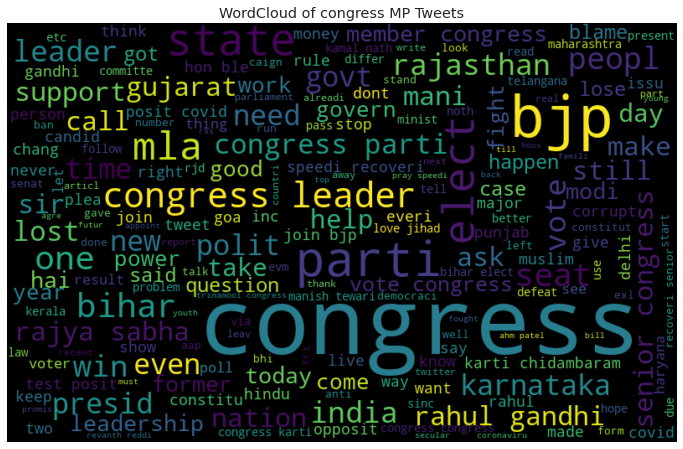

In [141]:
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(' '.join(text))
plt.figure(figsize = (12, 12), facecolor="None") 
plt.imshow(wordcloud,interpolation='bilinear') 
plt.axis("off") 
plt.title("WordCloud of congress MP Tweets")
plt.show()

In [142]:
from textblob import TextBlob
pol=[]
for Tweet in all_words:
    blob = TextBlob(Tweet)
    pol.append(blob.sentiment.polarity)
len(pol)

864

In [143]:
len(text)

15354

In [144]:
positive=0
negative=0
neutral=0
for i in pol:
    if i>0:
        positive+=1
    elif i<0:
        negative+=1
    else:
        neutral+=1
print("Positive Tweets:",positive)
print("Negative Tweets:",negative)
print("Neutral Tweets",neutral)

Positive Tweets: 361
Negative Tweets: 151
Neutral Tweets 352


In [145]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [146]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
sentiment_scores= []
for i in all_words:
    sentiment_scores.append([sid.polarity_scores(i)])

In [147]:
value = []
for i in sentiment_scores:
    for dict1 in i:
        value.append(list(dict1.values()))
sentimental_score_df = pd.DataFrame(data = value, columns = ['Negative','Neutral','Positive','Compound'])
sentimental_score_df

,Negative,Neutral,Positive,Compound
0,0.175,0.614,0.211,0.1027
1,0.222,0.778,0.000,-0.5719
2,0.000,1.000,0.000,0.0000
3,0.231,0.769,0.000,-0.5574
4,0.172,0.693,0.135,-0.0258
...,...,...,...,...
859,0.000,1.000,0.000,0.0000
860,0.000,0.735,0.265,0.6705
861,0.000,0.686,0.314,0.8271
862,0.000,0.815,0.185,0.6124


In [148]:
sentimental_score_df['val'] = sentimental_score_df['Compound'].apply(lambda x: 'Neutral' if x == 0 else ('Positive' if x > 0 else 'Negative'))
sentimental_score_df.head()

,Negative,Neutral,Positive,Compound,val
0,0.175,0.614,0.211,0.1027,Positive
1,0.222,0.778,0.000,-0.5719,Negative
2,0.000,1.000,0.000,0.0000,Neutral
3,0.231,0.769,0.000,-0.5574,Negative
4,0.172,0.693,0.135,-0.0258,Negative


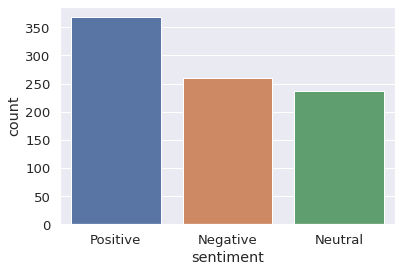

In [149]:
sent_count = pd.DataFrame.from_dict(Counter(sentimental_score_df['val']), orient = 'index').reset_index()
sent_count.columns = ['sentiment', 'count']

sns.barplot(y="count", x='sentiment', data=sent_count)

In [150]:
filepath = r"/content/Election-Prediction/StatewisePolitics/Madhya Pradesh/congress_mp.csv"
emolex_df = pd.read_csv(filepath,  names=["word", "emotion", "association"], skiprows=45, sep='\t')
emolex_df.head(12)
len(emolex_df)

1546

In [151]:
emotions={'positive':0, 'negative':0, 'surprise':0,'sadness':0,
          'anger':0,'joy':0,'negative':0,'trust':0,'fear':0,'anticipation':0,'disgust':0}

In [152]:
word_emotion=dict()
for i in range(0,1546):
    emotion=emolex_df['emotion'][i]
    word=emolex_df['word'][i]
    association=emolex_df['association'][i]
    
    if word not in word_emotion:
        word_emotion[word]=dict()
    word_emotion[word][emotion]=association


In [60]:
from numpy import nan
nan == nan


False

In [ ]:
for i in range(0,155):
    text=df['Tweet'][i]
    for j in text.split():
        if j in word_emotion:
            for k in word_emotion[j]:
                emotions[k]+=word_emotion[j][k]

KeyError: ignored

In [ ]:
emotions

{'anger': 0,
 'anticipation': 0,
 'disgust': 0,
 'fear': 0,
 'joy': 0,
 'negative': 0,
 'positive': 0,
 'sadness': 0,
 'surprise': 0,
 'trust': 0}

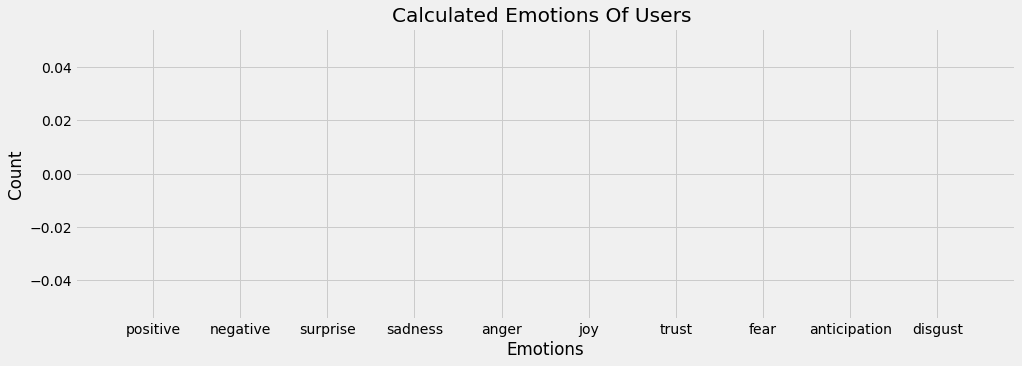

In [ ]:
plt.style.use('fivethirtyeight')
plt.rcParams["figure.figsize"] = [15,5]
plt.bar(list(emotions.keys()),list(emotions.values()),color='red',alpha = 0.6)
plt.xlabel('Emotions')
plt.ylabel('Count')
plt.title('Calculated Emotions Of Users ')
plt.show()

In [ ]:
df.Location  = df.Location.fillna('INDIA')
f = [i for i in df['Location'] if type(i) != str]
f

[]

In [ ]:
df.Location = df.Location.apply(lambda x: x.replace('United States','USA'))
df.Location.value_counts()

                    1357
India                317
Hyderabad, India      86
Mumbai, India         78
New Delhi, India      77
                    ... 
DC/Cape Town           1
भारत                   1
Hell, MI               1
Puri, India            1
Why?                   1
Name: Location, Length: 931, dtype: int64

In [ ]:
locations = []
locations_1 = []

locations = [i.split(',')[-1] for i in df['Location']]
locations_1 =  [i.split(',')[0] for i in df['Location']]
df['Processed_Location'] = locations_1
df

,Date,Tweet_id,Verified,Tweet,User,Location,Source,Likes,Followers,Following,Retweets,Processed_Tweet,Processed_Location
0,2020-11-21 23:36:37,1330294072947437568,False,#BJP &amp; #AIADMK tie-up to continue for 2021...,vipulananda,"Colombo, Sri Lanka",Twitter for iPhone,0,2973,5001,0,"[bjp, aiadmk, tie, continu, tamil, nadu, poll]",Colombo
1,2020-11-21 23:33:21,1330293250847088646,False,@my_prema @MyNameIsSenthil @King_Of_Lanka @New...,Meyy_Chennai,"Chennai, India",Twitter for Android,1,143,343,1,"[proof, singl, case, till, date, corrupt, guy,...",Chennai
2,2020-11-21 23:28:15,1330291967260057608,False,The ground worker in fact is in unenviable pos...,mainkaunhoon_,,Twitter Web App,0,41,5,0,"[ground, worker, fact, unenvi, posit, sibal, s...",
3,2020-11-21 23:25:43,1330291330124312590,False,"@KTRTRS @KTRTRS Sir, just ask BJP MP #KishanRe...",Hyderabadmpost,Hyderabad,FS Poster,0,38,236,0,"[sir, ask, bjp, kishanreddi, secunderabad, use...",Hyderabad
4,2020-11-21 23:19:03,1330289654227218438,False,#winner #Manipur Power through knowledge site:...,FutureWorldCen,UK,Tweet Suite,0,3685,4791,0,"[winner, manipur, power, knowledg, site, local...",UK
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3693,2020-11-15 12:03:45,1327945380315549696,False,Something good coming up in your way Sushil Mo...,pallzie,India,Twitter for Android,4,188,57,0,"[someth, good, come, way, sushil, modi, deputi...",India
3694,2020-11-15 11:56:22,1327943523212038147,False,@Mr_Siddharth There is a predictable sickening...,S_K_Raman,India,Twitter for iPhone,0,441,666,0,"[predict, sicken, chain, event, anti, hindu, e...",India
3695,2020-11-15 11:56:20,1327943515343527938,False,@BJP4India @bandisanjay_bjp @JPNadda @byadavbj...,KalakotaAbhine1,"Hyderabad, India",Twitter for Android,0,23,48,0,"[sir, pleas, help, back, work, help, famili, d...",Hyderabad
3696,2020-11-15 11:55:46,1327943372183461891,False,Talks were on that BJP will go for the UP mode...,Saysniha,भारत गणराज्य,Twitter for iPhone,4,965,291,0,"[talk, bjp, model, toh, hai, chatukaar, tere, ...",भारत गणराज्य


In [153]:
df1 = df
df1['sentiment'] = sentimental_score_df['val']

In [154]:
df1.to_csv('Location.csv',index = False)
df1['day'] = df.Date.dt.day
df1.head()

,Date,Tweet_id,Verified,Tweet,User,Location,Source,Likes,Followers,Following,Retweets,Processed_Tweet,sentiment,day
0,2020-11-21 23:17:33,1330289277079580672,False,#BREAKING \n\nProtesters burn part of #Guatema...,muhitreza,World,Twitter for Android,0,639,4997,0,"[break, protest, burn, part, guatemala, congre...",Positive,21
1,2020-11-21 20:51:49,1330252601947021313,False,@KumarK31857624 Commonwealth Games scam was ex...,ChinmaySoman4,,Twitter for Android,0,9,22,0,"[commonwealth, game, scam, expos, whose, gover...",Negative,21
2,2020-11-21 20:26:32,1330246239095574530,False,Who is the Leader of Congress?\nIs it a cow sh...,mv_john4,Kuwait - Mavelikara,Twitter for Android,10,2455,2801,1,"[leader, congress, cow, shed, incub, mla, pathet]",Neutral,21
3,2020-11-21 20:03:52,1330240535026667526,False,@GurrehmatO @KaushikAnubhav2 @kannadaveera @Th...,Venom2064114548,Haramkhor nagar,Twitter Web App,0,35,170,0,"[riot, sajjan, kumar, culprit, tha, phir, bhi,...",Negative,21
4,2020-11-21 19:55:57,1330238539238416385,False,@sardesairajdeep @KapilSibal @IndiaToday I agr...,vertigobp,India,Twitter for iPhone,1,26,503,0,"[agre, congress, tini, parti, front, bjp, bjp,...",Negative,21


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


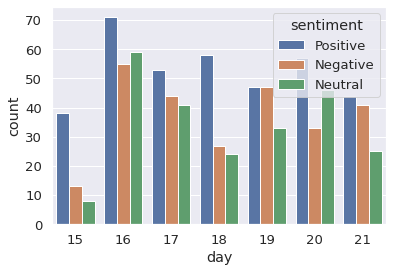

In [155]:
sns.countplot(df['day'],hue = df['sentiment'])

In [156]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import GridSearchCV
from sklearn import model_selection

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [157]:
le = LabelEncoder() 
  
df1['sentiment_1']= le.fit_transform(df1['sentiment'])
df1

,Date,Tweet_id,Verified,Tweet,User,Location,Source,Likes,Followers,Following,Retweets,Processed_Tweet,sentiment,day,sentiment_1
0,2020-11-21 23:17:33,1330289277079580672,False,#BREAKING \n\nProtesters burn part of #Guatema...,muhitreza,World,Twitter for Android,0,639,4997,0,"[break, protest, burn, part, guatemala, congre...",Positive,21,2
1,2020-11-21 20:51:49,1330252601947021313,False,@KumarK31857624 Commonwealth Games scam was ex...,ChinmaySoman4,,Twitter for Android,0,9,22,0,"[commonwealth, game, scam, expos, whose, gover...",Negative,21,0
2,2020-11-21 20:26:32,1330246239095574530,False,Who is the Leader of Congress?\nIs it a cow sh...,mv_john4,Kuwait - Mavelikara,Twitter for Android,10,2455,2801,1,"[leader, congress, cow, shed, incub, mla, pathet]",Neutral,21,1
3,2020-11-21 20:03:52,1330240535026667526,False,@GurrehmatO @KaushikAnubhav2 @kannadaveera @Th...,Venom2064114548,Haramkhor nagar,Twitter Web App,0,35,170,0,"[riot, sajjan, kumar, culprit, tha, phir, bhi,...",Negative,21,0
4,2020-11-21 19:55:57,1330238539238416385,False,@sardesairajdeep @KapilSibal @IndiaToday I agr...,vertigobp,India,Twitter for iPhone,1,26,503,0,"[agre, congress, tini, parti, front, bjp, bjp,...",Negative,21,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,2020-11-15 12:49:20,1327956852202586113,False,BJP ne MP banaya lekin Dr. ambedkar ke Constit...,MohdShaarifKha1,"Mumbai, India",Twitter for Android,0,90,794,0,"[bjp, banaya, lekin, ambedkar, constitut, cong...",Neutral,15,1
860,2020-11-15 12:38:12,1327954051825164290,False,Senior member of the Congress family and Rajya...,APRAHULSENAGRO,india,Twitter for Android,4,122,12,0,"[senior, member, congress, famili, rajya, sabh...",Positive,15,2
861,2020-11-15 12:37:59,1327953994791219200,False,@RNagothu Is it true that 'Savarkar &amp; Nath...,DesiPoliticks,,Twitter Web App,20,26156,392,2,"[true, savarkar, nathuram, gods, homosexu, rel...",Positive,15,2
862,2020-11-15 12:04:53,1327945666933387264,True,#Congress MP Ahmed Patel admitted to the Inten...,TheDailyPioneer,,Twitter Web App,13,24759,102,3,"[congress, ahm, patel, admit, intens, care, un...",Positive,15,2


In [158]:
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(all_words).toarray()
y = df1['sentiment_1']

In [159]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
# NEGATIVE == 0
# NEUTRAL == 1
# POSITIVE == 2

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size = 0.3, random_state = 0)

In [160]:
classifier_DT = DecisionTreeClassifier()
classifier_DT.fit(X_train, y_train)
y_pred_DT = classifier_DT.predict(X_test)

In [161]:
accuracy_score_DT = accuracy_score(y_test, y_pred_DT)
precision_score_DT = precision_score(y_test, y_pred_DT , average = 'micro')
recall_score_DT = recall_score(y_test, y_pred_DT , average = 'micro')
f1_score_DT = f1_score(y_test, y_pred_DT , average = 'micro')
print("Accuracy Score: " , accuracy_score_DT)
print("Precision Score: " , precision_score_DT)
print("Recall Score: " , recall_score_DT)
print("F1 Score: " , f1_score_DT)

Accuracy Score:  0.6653846153846154
Precision Score:  0.6653846153846154
Recall Score:  0.6653846153846154
F1 Score:  0.6653846153846154


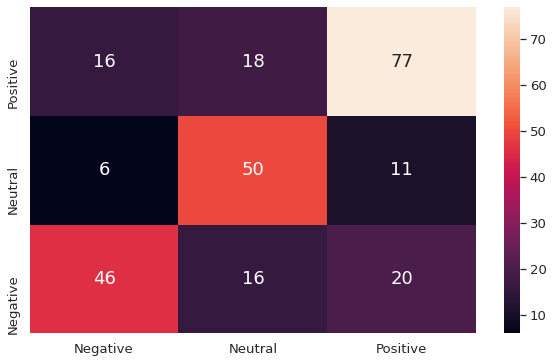

In [162]:
cm_DT = confusion_matrix(y_test, y_pred_DT)

      # neg # neutr  # pos
# pos #  232   65      1397
# neu #  87   1175     51
# neg # 1104   82      321

df_cm_DT = pd.DataFrame(cm_DT, range(3), range(3))
plt.figure(figsize=(10,6))
categories = ['Negative','Neutral','Positive']
sns.set(font_scale=1.2) # for label size
sns.heatmap(df_cm_DT, annot=True, annot_kws={"size": 18}, xticklabels = categories,
            yticklabels = categories ,fmt="d") # font size
plt.ylim(0, 3)
plt.show()

In [163]:
#Getting the parameters of the particular model 
classifier_DT.get_params().keys()

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'presort', 'random_state', 'splitter'])

In [164]:
classifier_DT_opti = DecisionTreeClassifier() 

param_grid = {"max_depth" : [1,3,5,7],     #Setting the parameters for the model
               "criterion" : ["gini","entropy"],
              "min_samples_split" : [2,3,4],
              "max_leaf_nodes" : [7,8,9],
              "min_samples_leaf": [2,3,4],
             }

In [165]:
model_DT = model_selection.GridSearchCV(estimator=classifier_DT_opti, #GridSearch
                                    param_grid=param_grid, 
                                        cv=10)
model_DT.fit(X_train,y_train)
print(model_DT.best_score_) #Gives the best score of the model
print(model_DT.best_estimator_.get_params()) #Gives the best parameters

0.44696721311475407
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 7, 'max_features': None, 'max_leaf_nodes': 9, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 3, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': None, 'splitter': 'best'}


In [166]:
y_pred_model_DT = model_DT.predict(X_test)

accuracy_score_model_DT = accuracy_score(y_test, y_pred_model_DT)
precision_score_model_DT = precision_score(y_test, y_pred_model_DT , average = 'micro')
recall_score_model_DT = recall_score(y_test, y_pred_model_DT , average = 'micro')
f1_score_model_DT = f1_score(y_test, y_pred_model_DT , average = 'micro')
print("Accuracy Score: " , accuracy_score_model_DT)
print("Precision Score: " , precision_score_model_DT)
print("Recall Score: " , recall_score_model_DT)
print("F1 Score: " , f1_score_model_DT)

Accuracy Score:  0.45
Precision Score:  0.45
Recall Score:  0.45
F1 Score:  0.45


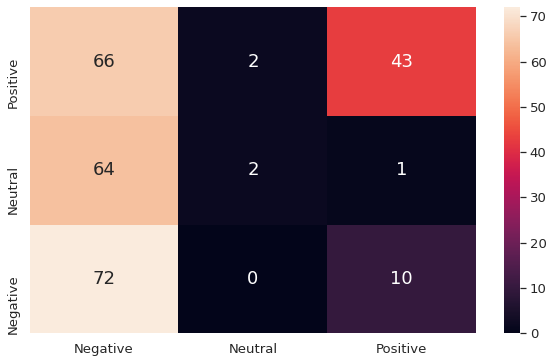

In [167]:
cm_model_DT = confusion_matrix(y_test, y_pred_model_DT)

df_cm_model_DT = pd.DataFrame(cm_model_DT, range(3), range(3))
plt.figure(figsize=(10,6))
categories = ['Negative','Neutral','Positive']
sns.set(font_scale=1.2) # for label size
sns.heatmap(df_cm_model_DT, annot=True, annot_kws={"size": 18}, xticklabels = categories,
            yticklabels = categories ,fmt="d") # font size
plt.ylim(0, 3)
plt.show()

In [168]:
classifier_RF = RandomForestClassifier()
classifier_RF.fit(X_train, y_train)
y_pred_RF = classifier_RF.predict(X_test)

In [169]:
accuracy_score_RF = accuracy_score(y_test, y_pred_RF)
precision_score_RF = precision_score(y_test, y_pred_RF , average = 'micro')
recall_score_RF = recall_score(y_test, y_pred_RF, average = 'micro')
f1_score_RF = f1_score(y_test, y_pred_RF, average = 'micro')
print("Accuracy Score: " , accuracy_score_RF)
print("Precision Score: " , precision_score_RF)
print("Recall Score: " , recall_score_RF)
print("F1 Score: " , f1_score_RF)

Accuracy Score:  0.6884615384615385
Precision Score:  0.6884615384615385
Recall Score:  0.6884615384615385
F1 Score:  0.6884615384615385


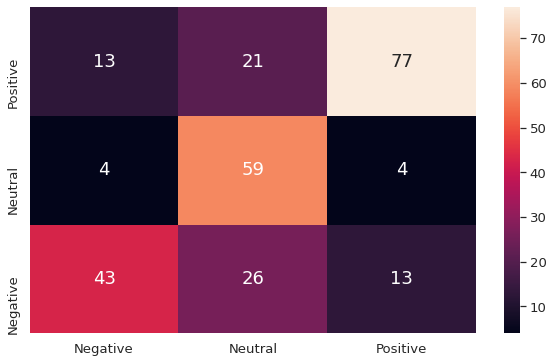

In [170]:
cm_RF = confusion_matrix(y_test, y_pred_RF)

df_cm_RF = pd.DataFrame(cm_RF, range(3), range(3))
categories = ['Negative','Neutral','Positive']
plt.figure(figsize=(10,6))
sns.set(font_scale=1.2) # for label size
sns.heatmap(df_cm_RF, annot=True, annot_kws={"size": 18}, xticklabels = categories,
            yticklabels = categories,fmt="d") # font size
plt.ylim(0, 3)
plt.show()

In [171]:
#Getting the parameters of the particular model 
classifier_RF.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [172]:
classifier_RF_opti = RandomForestClassifier()
param_grid = {"n_estimators": np.arange(100,1500,100), #Selecting the parameters
               "max_depth": np.arange(1,20),
               "criterion": ["gini","entropy"], 
              }

classifier_model_RF = model_selection.RandomizedSearchCV(estimator=classifier_RF_opti, #RandomizedSearch
                                    param_distributions=param_grid,
                                    n_iter=10,
                                    scoring='accuracy',
                                    verbose=10,
                                    n_jobs=1,
                                    cv=5)

classifier_model_RF.fit(X_train,y_train)
print(classifier_model_RF.best_score_) #Gives the best score of the model
print(classifier_model_RF.best_estimator_.get_params()) #Gives the best parameters of the model

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=200, max_depth=6, criterion=entropy ................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=200, max_depth=6, criterion=entropy, score=0.479, total=   0.5s
[CV] n_estimators=200, max_depth=6, criterion=entropy ................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV]  n_estimators=200, max_depth=6, criterion=entropy, score=0.488, total=   0.4s
[CV] n_estimators=200, max_depth=6, criterion=entropy ................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.9s remaining:    0.0s


[CV]  n_estimators=200, max_depth=6, criterion=entropy, score=0.488, total=   0.4s
[CV] n_estimators=200, max_depth=6, criterion=entropy ................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.3s remaining:    0.0s


[CV]  n_estimators=200, max_depth=6, criterion=entropy, score=0.455, total=   0.4s
[CV] n_estimators=200, max_depth=6, criterion=entropy ................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.7s remaining:    0.0s


[CV]  n_estimators=200, max_depth=6, criterion=entropy, score=0.542, total=   0.4s
[CV] n_estimators=1100, max_depth=11, criterion=gini .................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.2s remaining:    0.0s


[CV]  n_estimators=1100, max_depth=11, criterion=gini, score=0.545, total=   2.5s
[CV] n_estimators=1100, max_depth=11, criterion=gini .................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    4.6s remaining:    0.0s


[CV]  n_estimators=1100, max_depth=11, criterion=gini, score=0.504, total=   2.4s
[CV] n_estimators=1100, max_depth=11, criterion=gini .................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    7.1s remaining:    0.0s


[CV]  n_estimators=1100, max_depth=11, criterion=gini, score=0.512, total=   2.4s
[CV] n_estimators=1100, max_depth=11, criterion=gini .................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    9.4s remaining:    0.0s


[CV]  n_estimators=1100, max_depth=11, criterion=gini, score=0.537, total=   2.3s
[CV] n_estimators=1100, max_depth=11, criterion=gini .................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   11.8s remaining:    0.0s


[CV]  n_estimators=1100, max_depth=11, criterion=gini, score=0.583, total=   2.3s
[CV] n_estimators=300, max_depth=6, criterion=gini ...................
[CV]  n_estimators=300, max_depth=6, criterion=gini, score=0.471, total=   0.6s
[CV] n_estimators=300, max_depth=6, criterion=gini ...................
[CV]  n_estimators=300, max_depth=6, criterion=gini, score=0.471, total=   0.5s
[CV] n_estimators=300, max_depth=6, criterion=gini ...................
[CV]  n_estimators=300, max_depth=6, criterion=gini, score=0.479, total=   0.6s
[CV] n_estimators=300, max_depth=6, criterion=gini ...................
[CV]  n_estimators=300, max_depth=6, criterion=gini, score=0.446, total=   0.6s
[CV] n_estimators=300, max_depth=6, criterion=gini ...................
[CV]  n_estimators=300, max_depth=6, criterion=gini, score=0.533, total=   0.6s
[CV] n_estimators=700, max_depth=7, criterion=entropy ................
[CV]  n_estimators=700, max_depth=7, criterion=entropy, score=0.479, total=   1.4s
[CV] n_es

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.6min finished


0.576198347107438
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 19, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 1400, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [173]:
y_pred_model_RF = classifier_model_RF.predict(X_test)

accuracy_score_model_RF = accuracy_score(y_test, y_pred_model_RF)
precision_score_model_RF = precision_score(y_test, y_pred_model_RF , average = 'micro')
recall_score_model_RF = recall_score(y_test, y_pred_model_RF , average = 'micro')
f1_score_model_RF = f1_score(y_test, y_pred_model_RF , average = 'micro')
print("Accuracy Score: " , accuracy_score_model_RF)
print("Precision Score: " , precision_score_model_RF)
print("Recall Score: " , recall_score_model_RF)
print("F1 Score: " , f1_score_model_RF)

Accuracy Score:  0.5576923076923077
Precision Score:  0.5576923076923077
Recall Score:  0.5576923076923077
F1 Score:  0.5576923076923077


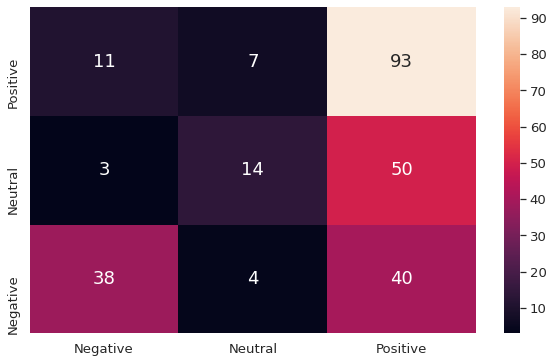

In [174]:
cm_model_RF = confusion_matrix(y_test, y_pred_model_RF)

df_cm_model_RF = pd.DataFrame(cm_model_RF, range(3), range(3))
plt.figure(figsize=(10,6))
categories = ['Negative','Neutral','Positive']
sns.set(font_scale=1.2) # for label size
sns.heatmap(df_cm_model_RF, annot=True, annot_kws={"size": 18}, xticklabels = categories,
            yticklabels = categories ,fmt="d") # font size
plt.ylim(0, 3)
plt.show()

In [176]:
classifier_NB = MultinomialNB()
classifier_NB.fit(X_train, y_train)
y_pred_NB = classifier_NB.predict(X_test)

accuracy_score_NB = accuracy_score(y_test, y_pred_NB)
precision_score_NB = precision_score(y_test, y_pred_NB , average = 'micro')
recall_score_NB = recall_score(y_test, y_pred_NB, average = 'micro')
f1_score_NB = f1_score(y_test, y_pred_NB, average = 'micro')
print("Accuracy Score: " , accuracy_score_NB)
print("Precision Score: " , precision_score_NB)
print("Recall Score: " , recall_score_NB)
print("F1 Score: " , f1_score_NB)

Accuracy Score:  0.6230769230769231
Precision Score:  0.6230769230769231
Recall Score:  0.6230769230769231
F1 Score:  0.6230769230769231


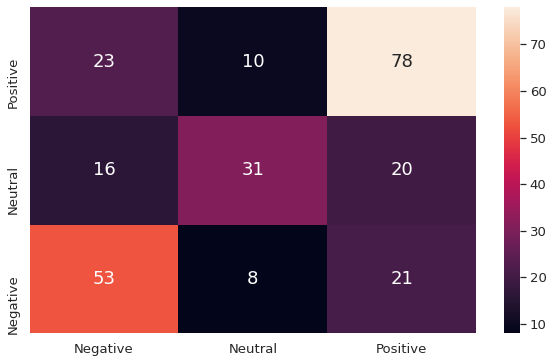

In [177]:
cm_NB = confusion_matrix(y_test, y_pred_NB)

df_cm_NB = pd.DataFrame(cm_NB, range(3), range(3))
plt.figure(figsize=(10,6))
categories = ['Negative','Neutral','Positive']
sns.set(font_scale=1.2) # for label size
sns.heatmap(df_cm_NB, annot=True, annot_kws={"size": 18}, xticklabels = categories,
            yticklabels = categories,fmt="d") # font size
plt.ylim(0, 3)
plt.show()

In [178]:
#Getting the parameters of the particular model 
classifier_NB.get_params().keys()

dict_keys(['alpha', 'class_prior', 'fit_prior'])

In [179]:
classifier_NB_opti = MultinomialNB() #Using the MultinomialNB
param_grid = {'alpha':[1,2,3,4], } #Selecting the parameters

classifier_model_NB = model_selection.GridSearchCV(estimator=classifier_NB_opti, #GridSearch
                                    param_grid=param_grid,
                                        cv=10)
classifier_model_NB.fit(X_train,y_train)
print(classifier_model_NB.best_score_) #Gives the best score of the model
print(classifier_model_NB.best_estimator_.get_params()) #Gives the best parameters of the model

0.6441256830601094
{'alpha': 1, 'class_prior': None, 'fit_prior': True}


In [180]:
y_pred_model_NB = classifier_model_NB.predict(X_test)

accuracy_score_model_NB = accuracy_score(y_test, y_pred_model_NB)
precision_score_model_NB = precision_score(y_test, y_pred_model_NB , average = 'micro')
recall_score_model_NB = recall_score(y_test, y_pred_model_NB , average = 'micro')
f1_score_model_NB = f1_score(y_test, y_pred_model_NB, average = 'micro')
print("Accuracy Score: " , accuracy_score_model_NB)
print("Precision Score: " , precision_score_model_NB)
print("Recall Score: " , recall_score_model_NB)
print("F1 Score: " , f1_score_model_NB)

Accuracy Score:  0.6230769230769231
Precision Score:  0.6230769230769231
Recall Score:  0.6230769230769231
F1 Score:  0.6230769230769231


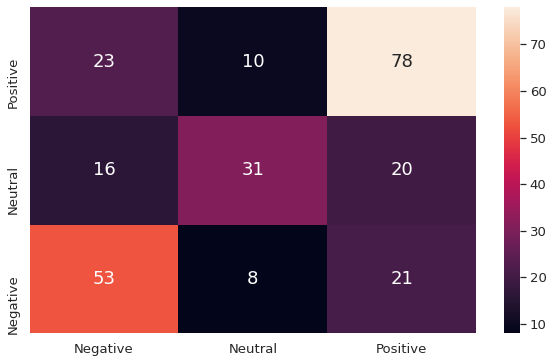

In [181]:
cm_model_NB = confusion_matrix(y_test, y_pred_model_NB)

df_cm_model_NB = pd.DataFrame(cm_model_NB, range(3), range(3))
plt.figure(figsize=(10,6))
categories = ['Negative','Neutral','Positive']
sns.set(font_scale=1.2) # for label size
sns.heatmap(df_cm_model_NB, annot=True, annot_kws={"size": 18}, xticklabels = categories,
            yticklabels = categories ,fmt="d") # font size
plt.ylim(0, 3)
plt.show()

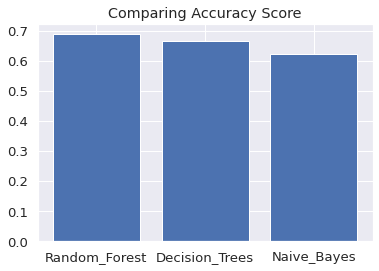

In [182]:
Accuracy = [accuracy_score_RF, accuracy_score_DT, accuracy_score_model_NB]
Methods = ['Random_Forest', 'Decision_Trees', 'Naive_Bayes']
Accuracy_pos = np.arange(len(Methods))
plt.bar(Accuracy_pos, Accuracy)
plt.xticks(Accuracy_pos, Methods)
plt.title('Comparing Accuracy Score')
plt.show()

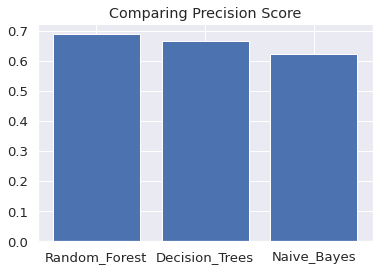

In [183]:
Precision = [precision_score_RF, precision_score_DT, precision_score_model_NB]
Methods = ['Random_Forest', 'Decision_Trees', 'Naive_Bayes']
Precision_pos = np.arange(len(Methods))
plt.bar(Precision_pos, Precision)
plt.xticks(Precision_pos, Methods)
plt.title('Comparing Precision Score')
plt.show()

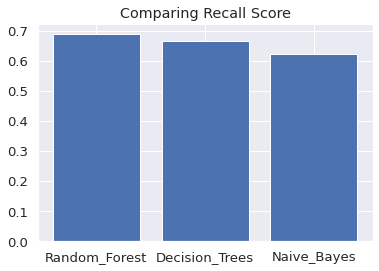

In [184]:
Recall = [recall_score_RF, recall_score_DT, recall_score_model_NB]
Methods = ['Random_Forest', 'Decision_Trees', 'Naive_Bayes']
Recall_pos = np.arange(len(Methods))
plt.bar(Recall_pos, Recall)
plt.xticks(Recall_pos, Methods)
plt.title('Comparing Recall Score')
plt.show()

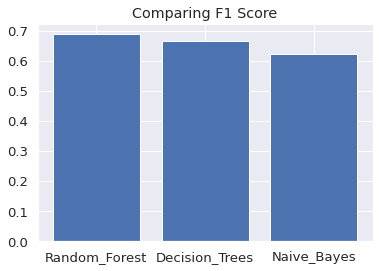

In [185]:

F1 = [f1_score_RF,f1_score_DT,f1_score_model_NB]
Methods = ['Random_Forest', 'Decision_Trees', 'Naive_Bayes']
F1_pos = np.arange(len(Methods))
plt.bar(F1_pos, F1)
plt.xticks(F1_pos, Methods)
plt.title('Comparing F1 Score')
plt.show()